---
## 1. Data Preparation

## 1.1 Load data


In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


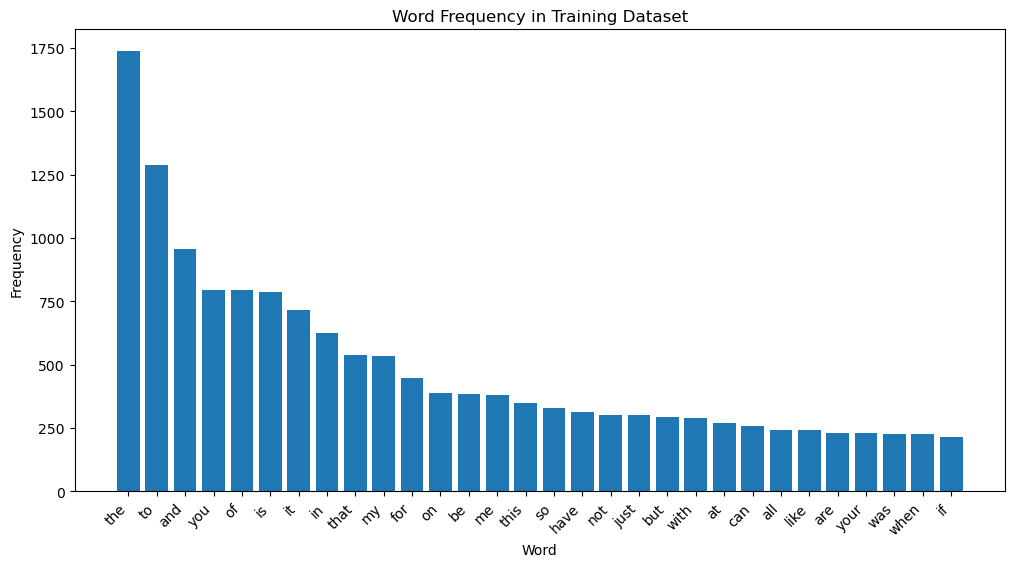

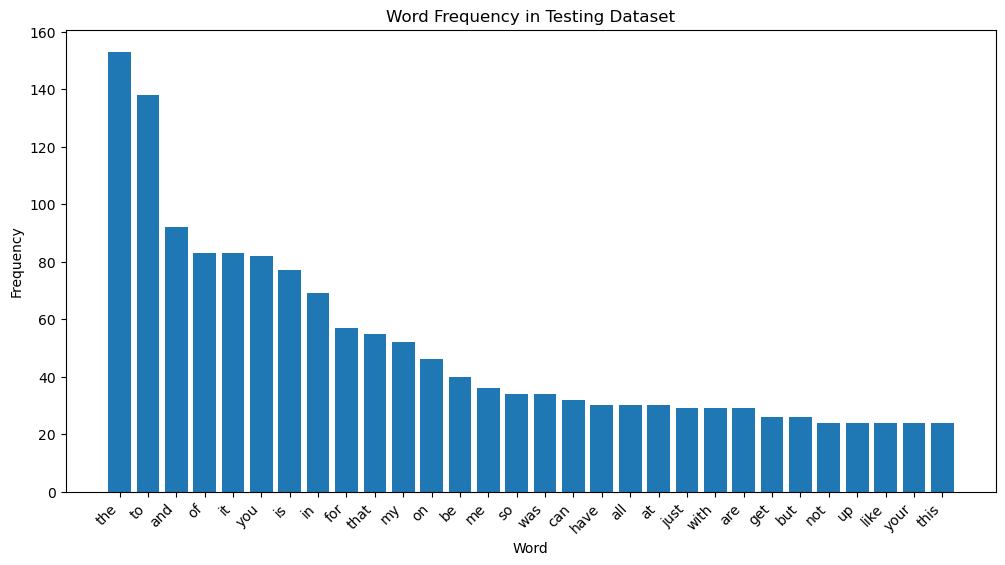

In [6]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot word frequency
def plot_word_frequency(data, title):
    # Create a CountVectorizer to convert text data to word frequencies
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    # Sum the word frequencies
    word_frequencies = X.sum(axis=0)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame to store word frequencies and their corresponding words
    word_freq_df = pd.DataFrame(list(zip(feature_names, word_frequencies.flat)), columns=['Word', 'Frequency'])

    # Sort DataFrame by word frequency in descending order
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

    # Plot the top 30 words
    plt.figure(figsize=(12, 6))
    plt.bar(word_freq_df['Word'][:30], word_freq_df['Frequency'][:30])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot word frequency for the top 30 words in the training dataset
plot_word_frequency(train_df, 'Word Frequency in Training Dataset')

# Plot word frequency for the top 30 words in the testing dataset
plot_word_frequency(test_df, 'Word Frequency in Testing Dataset')

---
### 1.2 Save data

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")


### 1.3 Exploratory data analysis (EDA)



In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

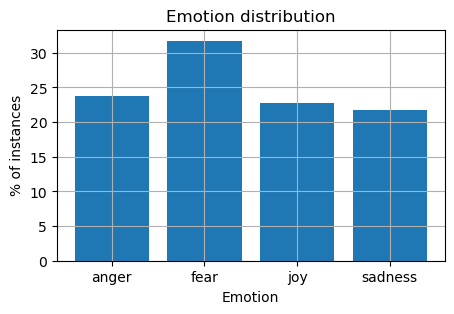

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [19]:
"😂" in feature_names

False

In [20]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /home/yllab/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/home/yllab/anaconda3/envs/python8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Build analyzer (TF-IDF)
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)

# Learn vocabulary dictionary and inverse document frequency from training data
TFIDF_vectorizer.fit(train_df['text'])

# Transform training and testing data to TF-IDF features
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# Check the dimension
print("Training TF-IDF features shape:", train_data_TFIDF_features.shape)

# Observe some feature names
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
print("Feature names [100:110]:", feature_names_TFIDF[100:110])

Training TF-IDF features shape: (3613, 1000)
Feature names [100:110]: ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees


In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'anger', 'sadness', 'joy', 'joy', 'joy',
       'fear', 'sadness'], dtype=object)

---
## 4. Results Evaluation

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

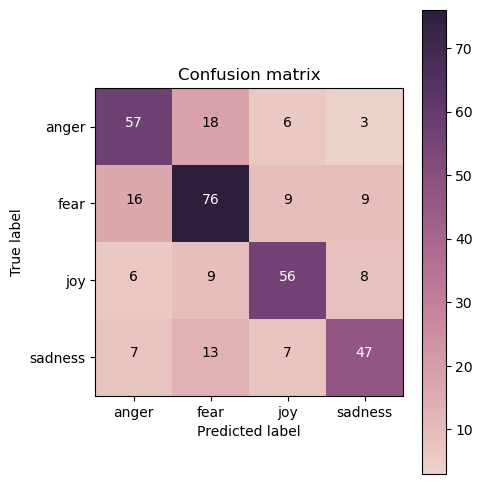

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer 
The above result is the confusion matrix of the model. The matrix

Row 1 (anger): The true label for 57 instances of the "anger" class was correctly predicted as "anger." 18 instances of "anger" were incorrectly predicted as "fear." 6 instances of "anger" were incorrectly predicted as "joy." 3 instances of "anger" were incorrectly predicted as "sadness."

Row 2 (fear): The true label for 76 instances of the "fear" class was correctly predicted as "fear." 16 instances of "fear" were incorrectly predicted as "anger." 9 instances of "fear" were incorrectly predicted as "joy." 9 instances of "fear" were incorrectly predicted as "sadness."

Row 3 (joy): The true label for 56 instances of the "joy" class was correctly predicted as "joy." 6 instances of "joy" were incorrectly predicted as "anger." 9 instances of "joy" were incorrectly predicted as "fear." 8 instances of "joy" were incorrectly predicted as "sadness."

Row 4 (sadness): The true label for 47 instances of the "sadness" class was correctly predicted as "sadness." 7 instances of "sadness" were incorrectly predicted as "anger." 13 instances of "sadness" were incorrectly predicted as "fear." 7 instances of "sadness" were incorrectly predicted as "joy."

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 



In [34]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Build TF-IDF Vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000)
TFIDF_vectorizer.fit(train_df['text'])

# 2. Transform training and testing data to TF-IDF features
X_train_tfidf = TFIDF_vectorizer.transform(train_df['text'])
X_test_tfidf = TFIDF_vectorizer.transform(test_df['text'])

# 3. Build Multinomial Naive Bayes model
NB_model = MultinomialNB()

# 4. Train the model
NB_model.fit(X_train_tfidf, train_df['emotion'])

# 5. Predict on training and testing data
y_train_pred_NB = NB_model.predict(X_train_tfidf)
y_test_pred_NB = NB_model.predict(X_test_tfidf)

# 6. Evaluate the model
# Accuracy
acc_train_NB = accuracy_score(y_true=train_df['emotion'], y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=test_df['emotion'], y_pred=y_test_pred_NB)

print('Training accuracy (Naive Bayes): {:.2f}'.format(acc_train_NB))
print('Testing accuracy (Naive Bayes): {:.2f}'.format(acc_test_NB))

# Classification Report
print('\nClassification Report (Naive Bayes):\n', classification_report(test_df['emotion'], y_test_pred_NB))

# Confusion Matrix
cm_NB = confusion_matrix(test_df['emotion'], y_test_pred_NB)
print('\nConfusion Matrix (Naive Bayes):\n', cm_NB)

Training accuracy (Naive Bayes): 0.87
Testing accuracy (Naive Bayes): 0.77

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347


Confusion Matrix (Naive Bayes):
 [[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer 
Naive Bayes Model:
Training Accuracy (Naive Bayes): 87%
Testing Accuracy (Naive Bayes): 77%

Decision Tree Model:
Training Accuracy (Decision Tree): 99%
Testing Accuracy (Decision Tree): 68%


Comparison and Interpretation:

Accuracy:
Naive Bayes: 77%
Decision Tree: 68%
The Naive Bayes model performs better in terms of overall accuracy on the testing set.

Overfitting:
The Decision Tree model has a significantly higher training accuracy (99%) compared to its testing accuracy (66%), indicating potential overfitting. 
This means that the Decision Tree model may have memorized the training data and performs less well on unseen data.

Interpretation:
Naive Bayes is a probabilistic model based on Bayes theorem. It assumes independence between features, which may not hold true in all cases but often works well for text classification tasks.
Decision Trees create complex decision boundaries and can capture intricate relationships in the data.
However, they are prone to overfitting, especially when the depth of the tree is not controlled.

Trade-off:
Naive Bayes provides a simpler and computationally efficient approach, especially for text data, where the independence assumption may not be a significant drawback.
Decision Trees offer more flexibility and can capture complex patterns, but they require careful tuning to avoid overfitting.


Naive Bayes model outperforms the Decision Tree model in terms of accuracy on the provided testing set while the later suffers from overfitting.
The Naive Bayes models probabilistic approach is well-suited for text classification, and its performance on unseen data is more balanced compared to the Decision Tree model, which exhibits signs of overfitting.

### 6.1 Prepare data (X, y)

In [33]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

2024-11-17 13:35:04.878301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-17 13:35:05.529362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [34]:
import keras

In [35]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

In [36]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1869     fear
1783     fear
2806      joy
572     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [37]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [38]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2024-11-17 13:35:23.837703: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9173 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
2024-11-17 13:35:23.839272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9612 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:b3:00.0, compute capability: 7.5


### 6.4 Train

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2024-11-17 13:35:38.244166: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x72265806da00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-17 13:35:38.244188: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-11-17 13:35:38.244193: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-11-17 13:35:38.247569: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-17 13:35:38.263178: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8700
2024-11-17 13:35:38.438657: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 [==============================] - 10s 72ms/step - loss: 1.3303 - accuracy: 0.3684 - val_loss: 1.2803 - val_accuracy: 0.4352
Epoch 2/25
113/113 [==============================] - 2s 22ms/step - loss: 1.0019 - accuracy: 0.6330 - val_loss: 0.9320 - val_accuracy: 0.6628
Epoch 3/25
113/113 [==============================] - 1s 11ms/step - loss: 0.5952 - accuracy: 0.7899 - val_loss: 0.7956 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 1s 9ms/step - loss: 0.4182 - accuracy: 0.8497 - val_loss: 0.7584 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 1s 6ms/step - loss: 0.3289 - accuracy: 0.8829 - val_loss: 0.8155 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2673 - accuracy: 0.9045 - val_loss: 0.8643 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 1s 7ms/step - loss: 0.2269 - accuracy: 0.9222 - val_loss: 0.9084 - val_accuracy: 0.6859
Epoch 8/25
11

### 6.5 Predict on testing data

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[9.9956304e-01, 1.1684693e-04, 2.2045431e-04, 9.9606201e-05],
       [9.9215573e-01, 2.6219388e-04, 3.0588515e-07, 7.5818226e-03],
       [1.9753803e-03, 9.9784720e-01, 8.8610468e-05, 8.8886052e-05],
       [9.9989152e-01, 9.7556993e-05, 5.7389611e-06, 5.1940383e-06],
       [1.1441478e-03, 1.5833843e-03, 1.2074665e-07, 9.9727231e-01]],
      dtype=float32)

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'fear', 'anger', 'sadness'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368392,1.330310,0.435158,1.280323
1,1,0.632992,1.001856,0.662824,0.932032
2,2,0.789925,0.595200,0.694524,0.795622
3,3,0.849709,0.418206,0.708934,0.758384
4,4,0.882923,0.328912,0.697406,0.815472
5,5,0.904512,0.267303,0.700288,0.864334
6,6,0.922225,0.226897,0.685879,0.908352
7,7,0.937725,0.188292,0.688761,0.944237
8,8,0.948519,0.162111,0.680115,1.007779
9,9,0.960421,0.142043,0.688761,1.055238


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

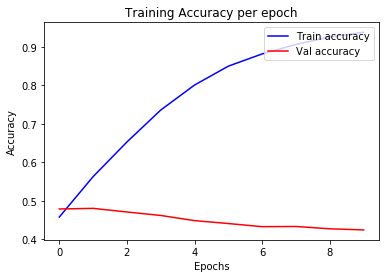


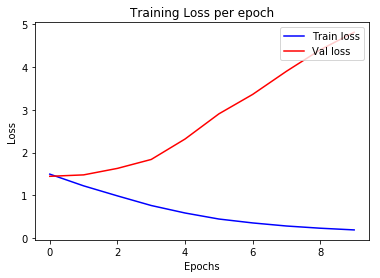

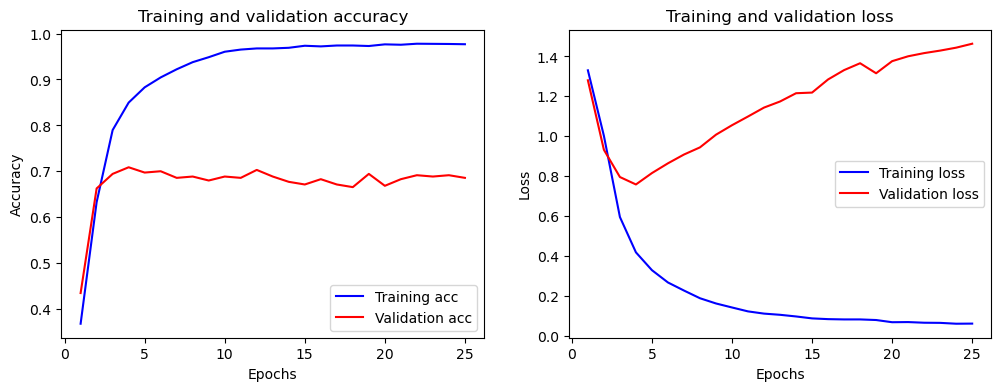

In [44]:
# Answer here
import matplotlib.pyplot as plt

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 7.1 Prepare training corpus

In [47]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1869,21012,And I would advise that everyone wait to watch...,"[And, I, would, advise, that, everyone, wait, ..."
1783,20926,You make me breathless.,"[You, make, me, breathless, .]"
2806,30802,Wanted to get him a cake with sparkling candle...,"[Wanted, to, get, him, a, cake, with, sparklin..."
572,10572,the 1975 are playing antichrist why won't @sun...,"[the, 1975, are, playing, antichrist, why, wo,..."
1889,21032,You have a #problem? Yes! Can you do #somethin...,"[You, have, a, #, problem, ?, Yes, !, Can, you..."


In [49]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['And', 'I', 'would', 'advise', 'that', 'everyone', 'wait', 'to', 'watch', '@', 'KevinCanWaitCBS', ',', 'or', 'actually', 'do', "n't", 'wait', ',', 'just', 'do', "n't", 'even', 'watch', 'it', 'because', 'it', 'is']),
       list(['You', 'make', 'me', 'breathless', '.']),
       list(['Wanted', 'to', 'get', 'him', 'a', 'cake', 'with', 'sparkling', 'candles', 'but', 'he', 'does', "n't", 'like', 'cake😒😒', '.', 'Ruins', 'everything'])],
      dtype=object)

### 7.2 Training our model



In [50]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [51]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.634418  ,  0.08759183, -0.26812235,  0.3272969 , -0.10875471,
       -1.0602603 ,  0.4505161 ,  1.1507089 , -0.3152989 , -0.34085214,
       -0.57995087, -0.67340094, -0.52865493, -0.05278864,  0.11555638,
       -0.6994887 ,  0.31323376, -0.7100197 ,  0.69877476, -0.9131016 ,
        0.23628616,  0.744328  ,  0.64087975,  0.53901505,  0.15486313,
        0.0098859 , -0.8452055 ,  0.551726  , -0.5641311 ,  0.1556629 ,
        0.62504506, -0.30352756,  0.3898085 , -0.62601036, -0.4038275 ,
        0.57669854,  0.40941733, -0.43323928, -0.5050549 , -0.6348986 ,
       -0.16003627, -0.01920012, -0.3836513 ,  0.04435329,  0.92696047,
       -0.06636354, -1.1302239 ,  0.28136835,  0.5123008 ,  0.16352056,
       -0.12076614, -0.48378152,  0.30155402, -0.10474724, -0.06748627,
       -0.16870946,  0.24442671,  0.19017512, -0.07124491, -0.27452743,
       -0.12987262, -0.21085395,  0.4310782 ,  0.080516  , -0.5030847 ,
        0.33466244,  0.3027043 ,  0.6634197 , -1.5193491 ,  0.19

In [52]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9149311184883118),
 ('Be', 0.9134822487831116),
 ('bday', 0.9103917479515076),
 ('nuclear', 0.9039051532745361),
 ('free', 0.8976290822029114),
 ('cats', 0.8930980563163757),
 ('dad', 0.8915249705314636),
 ('farm365', 0.8911666870117188),
 ('help', 0.8908843994140625),
 ('RiceFODays', 0.8881739974021912)]

### 7.4 Using a pre-trained w2v model


In [53]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949078559875),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api



In [54]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323722839355),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

In [55]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235944390296936),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [56]:
# Answer here
import numpy as np

def get_sentence_vector(words, model, vector_dim):
    # Filter words that are present in the Word2Vec model
    valid_words = [word for word in words if word in model.wv]
    
    if not valid_words:
        # If no valid words are present, return a zero vector
        return np.zeros(vector_dim)
    
    # Calculate the average of word vectors
    word_vectors = [model.wv[word] for word in valid_words]
    sentence_vector = np.mean(word_vectors, axis=0)
    
    return sentence_vector

# Example usage:
sentence = "I am feeling happy"
tokenized_sentence = nltk.word_tokenize(sentence.lower())  # Tokenize and lowercase the sentence
vector_dim = 100  # Assuming the vector dimensionality is 100 (adjust based on your Word2Vec model)
sentence_vector = get_sentence_vector(tokenized_sentence, word2vec_model, vector_dim)
print(sentence_vector)

[ 0.03785023  0.13391063  0.3418771  -0.06300335 -0.14567564 -1.1089863
  0.44312775  1.0043199  -0.444161   -0.591143   -0.6291849  -1.0325459
 -0.4147295   0.06338617 -0.10790374 -0.8739823   0.2980999  -0.13766074
  0.36256582 -1.0079395   0.24460977  0.19692604  1.0454849   0.44540307
  0.03617198  0.51749235 -0.7311843  -0.16922781 -0.6151618   0.30201542
  0.5573342  -0.2176094   0.31212354 -0.9179551  -0.10338705  0.7971638
 -0.01333661 -0.5370577  -0.36701858 -1.0662572   0.08324228 -0.8276879
  0.0803641   0.44093502  0.8954199  -0.4148454  -0.5390724  -0.3363017
  0.31083006 -0.42433688  0.4018469  -0.6081212   0.39980888 -0.22072442
 -0.5320253   0.10048939 -0.13317291 -0.00838741 -0.3525763  -0.39605367
  0.7799065  -0.35571945  0.4865975   0.27686226 -0.523139    0.57798934
  0.35175908  0.9339518  -1.3952386   0.7239498  -0.2643089   0.30431813
  0.50015295  0.24717863  0.70994556  0.5614184   0.3543222   0.23163426
 -0.31149173  0.38650343 -0.60567594 -0.64566267 -0.6751

## 8. Clustering: k-means




In [57]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [58]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [59]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [60]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [61]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

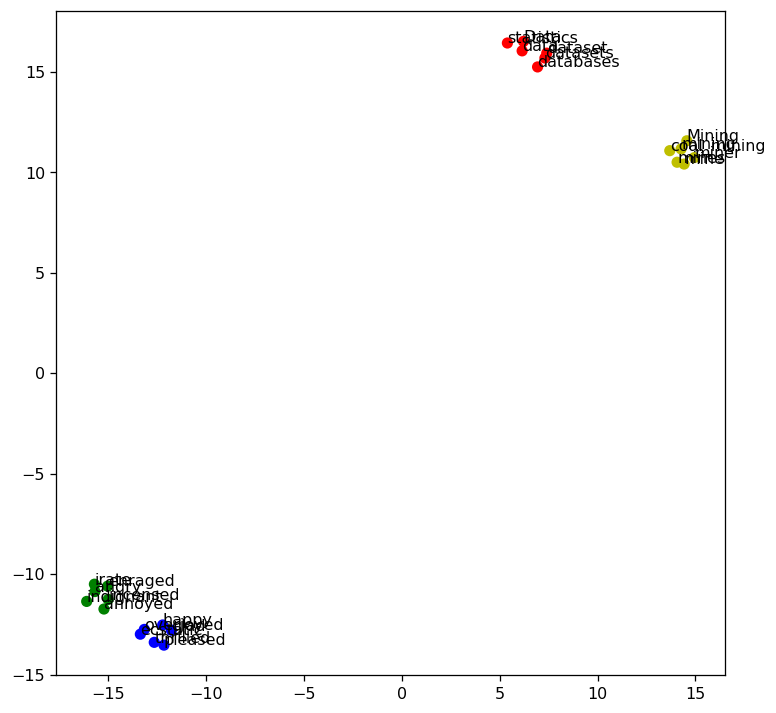

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

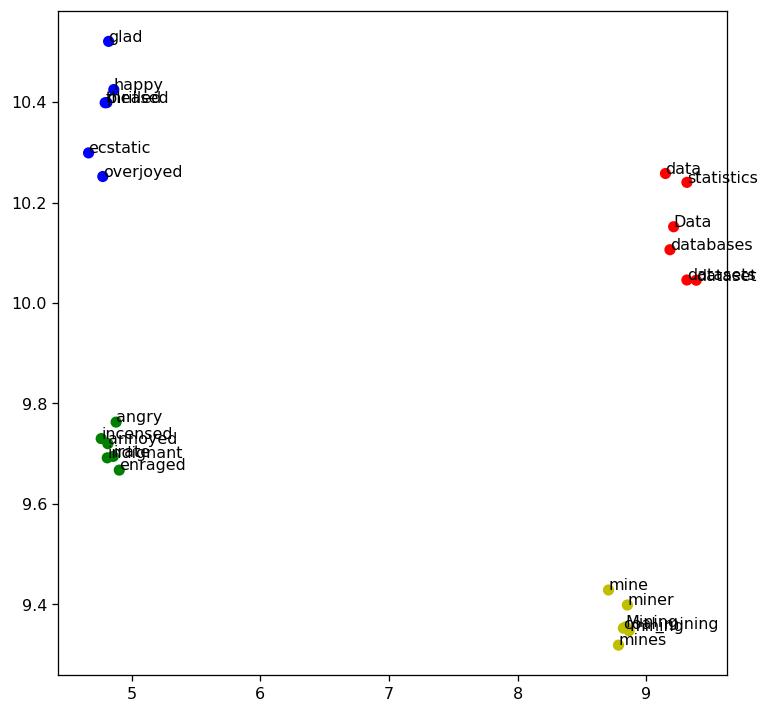

In [63]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

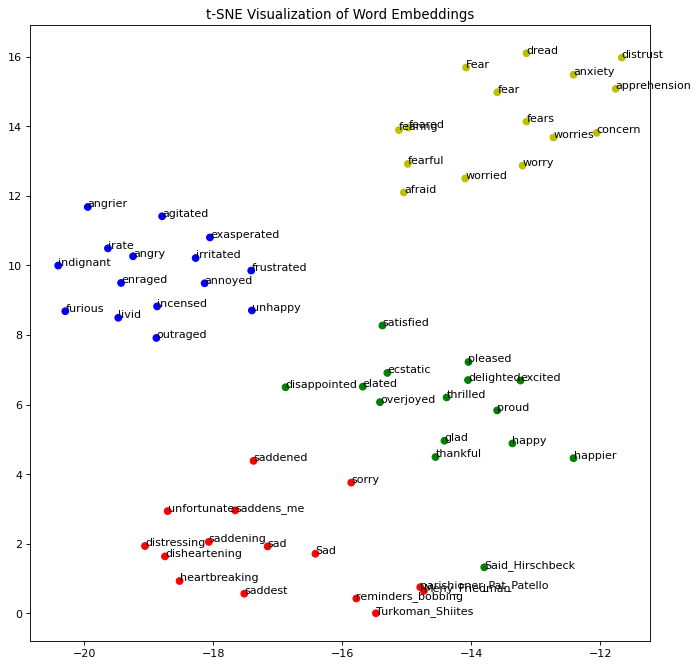

In [64]:
# Answer here
# Words to visualize
word_lists = {
    'angry': ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=14)],
    'happy': ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=14)],
    'sad': ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=14)],
    'fear': ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=14)],
}

# Combine all target words
target_words = sum(word_lists.values(), [])

# Assign colors
cn = 15
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# Training
X_tsne = tsne.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:60, 0], X_tsne[:60, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:60, 0], X_tsne[:60, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

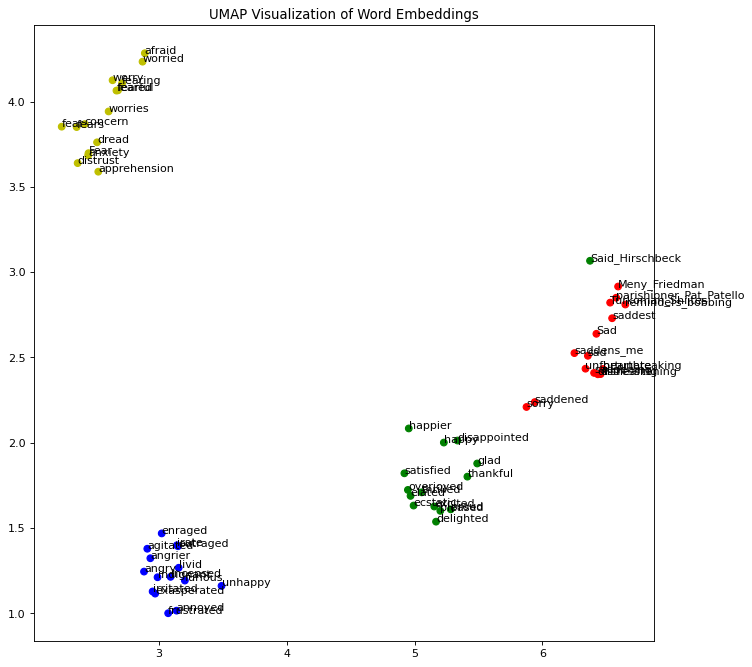

In [66]:
import matplotlib.pyplot as plt
import umap

# Words to visualize
word_lists = {
    'angry': ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=14)],
    'happy': ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=14)],
    'sad': ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=14)],
    'fear': ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=14)],
}

# Combine all target words
target_words = sum(word_lists.values(), [])

# Assign colors
cn = 15
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# Prepare training word vectors
size = 200
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# UMAP model
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=28)

# Training
X_umap = umap_model.fit_transform(X_train)

# Plot the result
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_umap[:60, 0], X_umap[:60, 1], c=color)
for label, x, y in zip(target_words, X_umap[:60, 0], X_umap[:60, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.title("UMAP Visualization of Word Embeddings")
plt.show()


## 10. Large Language Models (LLMs)


### 10.1 Text Prompting


In [69]:
pip install ollama

Note: you may need to restart the kernel to use updated packages.


In [73]:
!ollama list


NAME             ID              SIZE      MODIFIED   
llama2:latest    78e26419b446    3.8 GB    8 days ago    


In [79]:
!ollama pull llama3.2


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕                ▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕         

In [80]:
!ollama list

NAME               ID              SIZE      MODIFIED      
llama3.2:latest    a80c4f17acd5    2.0 GB    4 minutes ago    
llama2:latest      78e26419b446    3.8 GB    8 days ago       


In [76]:
import ollama
response = ollama.chat(model='llama2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

Data Mining: The Process of Uncovering Hidden Patterns and Relationships in Large Data Sets

Data mining is the process of discovering valuable insights and patterns from large datasets. It involves analyzing and interpreting data to identify patterns, trends, and relationships that can be used to improve decision-making processes or solve problems. In this article, we will explore the concepts and techniques of data mining, as well as its applications in various fields.

What is Data Mining?
-------------------

Data mining is the process of analyzing and transforming raw data into useful information. It involves using various algorithms and techniques to extract insights from large datasets, which can be used for a variety of purposes such as:

### 1. Predictive Modeling

Predictive modeling uses statistical models and machine learning algorithms to make predictions about future events or outcomes. This can help organizations identify potential risks or opportunities and make informe

In [81]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to identify hidden patterns or correlations in data.

## Characteristics of Data Mining
---------------------------------

*   **Large datasets**: Data mining typically involves working with massive amounts of data.
*   **Pattern discovery**: The goal is to discover patterns, relationships, or correlations that can be used to make predictions or inform decision-making.
*   **Automated process**: Data mining often involves using algorithms and automated techniques to identify patterns in the data.

## Types of Data Mining
----------------------

### 1. Descriptive Data Mining

*   Focuses on summarizing and describing the characteristics of the data.
*   Examples: generating summary statistics, creating reports.

### 2. Diagnostic Data Mining

*   Involves using statistical methods to identify un

In [85]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [86]:
display(Markdown(response['message']['content']))

# Data Mining
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to identify hidden patterns or correlations in data.

## Characteristics of Data Mining
---------------------------------

*   **Large datasets**: Data mining typically involves working with massive amounts of data.
*   **Pattern discovery**: The goal is to discover patterns, relationships, or correlations that can be used to make predictions or inform decision-making.
*   **Automated process**: Data mining often involves using algorithms and automated techniques to identify patterns in the data.

## Types of Data Mining
----------------------

### 1. Descriptive Data Mining

*   Focuses on summarizing and describing the characteristics of the data.
*   Examples: generating summary statistics, creating reports.

### 2. Diagnostic Data Mining

*   Involves using statistical methods to identify unusual patterns or outliers in the data.
*   Examples: identifying suspicious transactions, detecting anomalies.

### 3. Predictive Data Mining

*   Uses machine learning algorithms to make predictions about future events based on historical data.
*   Examples: predicting customer churn, forecasting sales.

### 4. Prescriptive Data Mining

*   Involves using optimization techniques to determine the best course of action based on the analysis of the data.
*   Examples: recommending products to customers, optimizing supply chains.

## Techniques Used in Data Mining
---------------------------------

*   **Regression analysis**: used for predicting continuous outcomes.
*   **Decision trees**: used for classification and regression tasks.
*   **Clustering algorithms**: used for identifying groups or patterns in the data.
*   **Text mining**: used for extracting insights from unstructured text data.

## Real-World Applications of Data Mining
-----------------------------------------

*   **Marketing**: personalized recommendations, customer segmentation.
*   **Finance**: credit risk assessment, portfolio optimization.
*   **Healthcare**: patient outcomes prediction, disease diagnosis.
*   **Social media**: sentiment analysis, influencer identification.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [87]:
# Answer here
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are a technical assistant who explains concepts concisely and provides code examples when possible.'
    },
    {
        'role': 'user',
        'content': 'Can you explain what a binary search is and provide an example in Python?'
    },
])

print(response['message']['content'])


**What is Binary Search?**

Binary search is an efficient algorithm for finding an item from a sorted list of items. It works by repeatedly dividing in half the portion of the list that could contain the item, until you've narrowed down the possible locations to just one.

**How does it work?**

Here's a step-by-step overview:

1. Start with a sorted list of items.
2. Find the middle element of the list.
3. Compare the target item (the item we're looking for) with the middle element.
4. If the target item is less than the middle element, repeat the process with the left half of the list.
5. If the target item is greater than the middle element, repeat the process with the right half of the list.
6. Repeat steps 2-5 until you find the target item or determine that it's not in the list.

**Python Example**

Here's an example implementation of binary search in Python:
```python
def binary_search(arr, target):
    """
    Find the index of a target element in a sorted array using binary se

#Answer
- The **`system` role** is helpful for setting up context or instructing the assistant on how to behave.
- The **`user role`** sends a question or command.
- Together, these roles allow for more tailored and dynamic conversations with the AI.

### 10.2 Multi-Modal Prompting - Text + Images


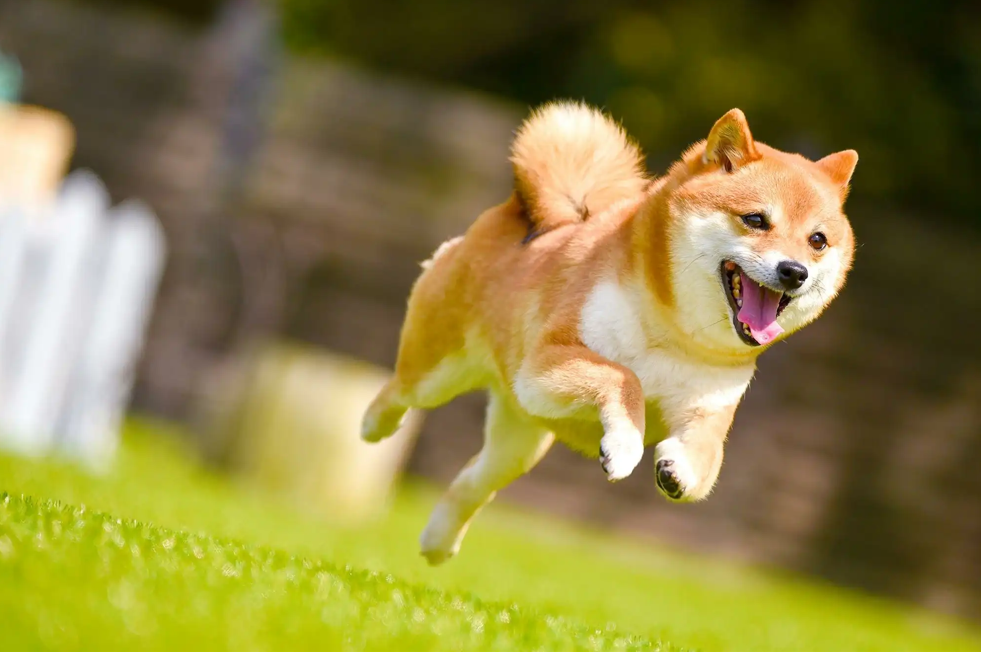
source: https://cooljapan-videos.com/tw/articles/epe0y86g

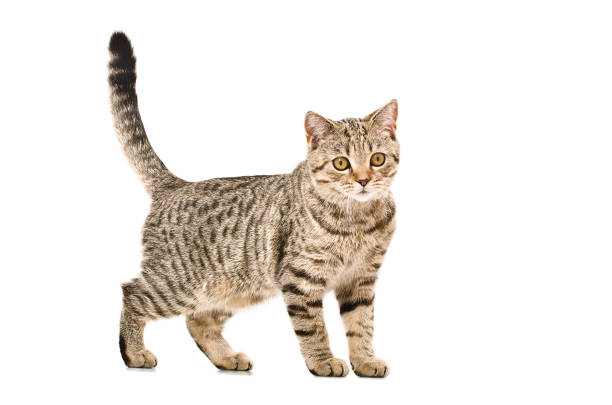
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

In [89]:
!ollama pull llava-phi3


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba

In [90]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image captures a lively scene of a Shiba Inu dog in mid-air, its body fully extended as it jumps over the lush green grass. The dog's fur is predominantly brown with white markings on its face and legs, giving it a unique and vibrant appearance. Its tail, curled upwards, adds to the sense of motion in the image.

The background provides a serene contrast to the dynamic foreground. A wooden fence stretches across the frame, suggesting an outdoor setting, possibly a garden or a park. Beyond the fence, there's a tree standing tall, its leaves adding a touch of nature's green to the scene.

The dog is positioned centrally in the image, drawing the viewer's attention immediately. Its action - jumping over the grass - creates a sense of excitement and energy. The relative positions of the objects - with the fence in front of the tree - provide depth to the image, enhancing its three-dimensional feel.

Overall, this image beautifully captures a moment of joy and playfulness in nature's setting.

In [91]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the center of a white background, a gray tabby cat stands poised and alert. The cat's tail hangs down behind its body, while its ears are perked up in attention. Its yellow eyes focus intently on something unseen to the right of the image, giving it an almost human-like curiosity. The cat's front paws are slightly apart, ready for action, and its back legs are spread out a bit more than its front ones. A striped pattern adorns its body, with stripes running horizontally on its back and diagonally on its sides, adding to its distinctive tabby appearance. The cat's position suggests it is facing the viewer, making for an engaging image of this feline friend.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [92]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/cow.jpeg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))


In the serene expanse of a field, a black and white cow stands as the central figure. Its body is primarily white, contrasting with its black spots on head and legs. The cow's gaze seems to be directed towards us, adding a sense of connection between the viewer and the animal.

The field itself is a vibrant canvas painted in hues of green, dotted here and there with yellow flowers that add a touch of color to the landscape. These fields stretch out into the distance where they meet a line of mountains, their peaks lightly veiled by clouds under a clear blue sky.

The image captures not just the cow but also its environment in exquisite detail - from the individual blades of grass on which it stands to the distant mountains that frame this pastoral scene. It's a snapshot of life in rural settings, where nature and animals coexist harmoniously.

# Answer 
It correctly identify the cow the background well but it fails while describing where the exact loaction of the cow is even hinting having legs which the picture doesnt have.
Yet it correctly describe the posture of the cow and the landscape behind the cow 

In [95]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.


IBM has several related solutions for Large Language Models (LLMs), including:

1. Watson Assistant: a cloud-based conversational AI service that uses IBM's LLMs to understand voice, text, or chat inputs and respond with contextually relevant answers.
2. Watson Orchestrate: a workflow automation platform that leverages IBM's LLMs to automate tasks, such as data processing and content generation.
3. Granite model series on watsonx.ai: a generative AI backbone for other IBM products, including text generation capabilities.

These solutions benefit organizations in various ways, including:

1. Text generation: automating the creation of mid-to-long form content, such as blog posts or emails.
2. Workflow automation: streamlining processes and improving efficiency through automation.
3. Customer experience: enhancing customer interactions through conversational AI.
4. Data-driven decision making: providing insights and recommendations to support informed decision-making.

Overall, IBM's LLM-related solutions aim to transform industries by improving productivity, accuracy, and accessibility.


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [96]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)
        all_splits.extend(splits)
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Accept three URLs or documents as input
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/watson",
    "https://www.ibm.com/cloud"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

# Function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example usage
questions = [
    "What is IBM's approach to LLMs and related solutions?",
    "What are some key features of IBM Watson?",
    "What cloud services does IBM provide?"
]

# Process each question
for question in questions:
    result = rag_chain(question)
    print(f"Question: {question}\n")
    display(Markdown(result))


Question: What is IBM's approach to LLMs and related solutions?



IBM's approach to Large Language Models (LLMs) and related solutions appears to be focused on utilizing their capabilities in various business functions and use cases across the enterprise, building upon years of research and development in natural language understanding (NLU), natural language processing (NLP), machine learning, and neural networks. 

While there is not a specific mention of IBM's strategy for LLMs in the given text snippet, it can be inferred that IBM's approach involves leveraging their expertise and experience to tailor these models to suit various business needs. This may include adapting their LLMs to specific industries or domains, such as healthcare, finance, or customer service.

In general, IBM has a history of using its AI capabilities for a wide range of applications across different sectors. Their strategy likely involves integrating their LLMs with existing systems and processes, ensuring seamless integration into various workflows and improving overall efficiency in operations, product development, marketing and sales strategies among others.

IBM's focus on utilizing these models to improve language understanding and generation suggests that they value the potential benefits of LLMs for enhancing decision-making capabilities across organizations. This could involve integrating their technology with existing systems such as CRM software or other customer-facing tools.

By providing a robust platform for leveraging large language models, IBM is positioned well in today's business landscape.

Question: What are some key features of IBM Watson?



Based on the provided information, some key features of IBM Watson include:

1. Natural Language Understanding (NLU) capabilities: IBM Watson's LLMs have been implemented to enhance its natural language understanding capabilities.
2. Natural Language Processing (NLP) capabilities: Similarly, IBM Watson's LLMs have also been developed to improve its NLP capabilities.
3. Advanced machine learning models and algorithms: The development of IBM Watson's LLMs involved advances in machine learning, including the use of neural networks and transformer models.
4. Self-supervised learning: IBM Watson's LLMs can learn from a massive corpus of text through self-supervised learning, allowing them to acquire patterns and knowledge that enable coherent and contextually relevant language generation.
5. Zero-shot learning: IBM Watson's LLMs also employ zero-shot learning, which enables them to learn from a vast amount of text data without requiring labeled examples.

These features contribute to IBM Watson's ability to generate coherent and contextually relevant text, making it suitable for various NLU and content generation tasks.

Question: What cloud services does IBM provide?



IBM provides various cloud services, including:

1. Cloud-based AI and NLP capabilities, such as natural language understanding (NLU) and natural language processing (NLP).
2. LLMs for content summarization, text generation, and code translation.
3. AI assistants, also known as chatbots, to answer customer queries, perform backend tasks, and provide detailed information in natural language.
4. Sentiment analysis to analyze text and determine the customer's tone, aiding in brand reputation management.
5. Language translation services with fluent translations and multilingual capabilities.

These cloud services are designed to help organizations adopt artificial intelligence across various business functions and use cases, leveraging advances in machine learning, machine learning models, algorithms, neural networks, and transformer models.

### 10.4 Generating LLM Embeddings:


In [97]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [98]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [99]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [100]:
df_train #We can see the new column with the embeddings 

,id,text,emotion,intensity,text_tokenized,embeddings
1869,21012,And I would advise that everyone wait to watch...,fear,0.266,"[And, I, would, advise, that, everyone, wait, ...","[-0.5042347311973572, -1.20719575881958, -1.11..."
1783,20926,You make me breathless.,fear,0.312,"[You, make, me, breathless, .]","[-2.218688726425171, 0.5364083647727966, -0.50..."
2806,30802,Wanted to get him a cake with sparkling candle...,joy,0.104,"[Wanted, to, get, him, a, cake, with, sparklin...","[0.2375687211751938, -1.6818914413452148, 2.00..."
572,10572,the 1975 are playing antichrist why won't @sun...,anger,0.417,"[the, 1975, are, playing, antichrist, why, wo,...","[-1.3928576707839966, 1.5998262166976929, 5.80..."
1889,21032,You have a #problem? Yes! Can you do #somethin...,fear,0.250,"[You, have, a, #, problem, ?, Yes, !, Can, you...","[-0.08510185778141022, 1.4770519733428955, 3.4..."
...,...,...,...,...,...,...
2767,30763,"@alphavenger all chuck seasons, she had that o...",joy,0.189,"[@, alphavenger, all, chuck, seasons, ,, she, ...","[-0.7299104928970337, 1.7245101928710938, 0.95..."
1359,20502,We can't stop racism overnight. Nor gun violen...,fear,0.521,"[We, ca, n't, stop, racism, overnight, ., Nor,...","[-2.0749428272247314, 0.4064168334007263, 1.84..."
342,10342,@djddueces jojo at 12:30 and not midnight lets...,anger,0.542,"[@, djddueces, jojo, at, 12:30, and, not, midn...","[-1.15952730178833, 3.068763017654419, 1.34219..."
2604,30600,Lil reminder that my private account is a deli...,joy,0.354,"[Lil, reminder, that, my, private, account, is...","[0.7220993638038635, -0.9768338203430176, 0.91..."


In [101]:
df_test #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings
72,10929,Just seeing Alex revells face gets me angry,anger,0.583,"[-0.9821417331695557, 0.9809062480926514, 4.23..."
35,10892,@pbhushan1 @IndianExpress so in your opinion i...,anger,0.708,"[-0.7064048051834106, 1.920311450958252, 0.196..."
84,21147,I know this is going to be one of those nights...,fear,0.771,"[-0.8061701655387878, 0.10989831387996674, -3...."
37,10894,i live and die for mchanzo honeymoon crashing ...,anger,0.479,"[-1.991773009300232, -0.6850309371948242, 3.20..."
333,40846,Should of stayed in Dubai 😞,sadness,0.708,"[-0.13635098934173584, 0.135603666305542, 0.51..."
...,...,...,...,...,...
145,21208,Rooney shocking attempted cross,fear,0.375,"[-1.4521055221557617, 2.38663387298584, 5.4551..."
192,21255,So about 18mths ago i signed up to @Lumo_Energ...,fear,0.479,"[-0.28362515568733215, 2.929260015487671, 2.99..."
67,10924,"Anger, resentment, and hatred are the destroye...",anger,0.396,"[-0.9744782447814941, 3.5311427116394043, -1.8..."
270,30899,@GigaFag @pipertownsend_ snapchat new would be...,joy,0.396,"[-2.003352165222168, 0.35425108671188354, -0.0..."


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [103]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [104]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.43515850144092216


In [105]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.37      0.42      0.39        84
        fear       0.51      0.53      0.52       110
         joy       0.41      0.41      0.41        79
     sadness       0.42      0.35      0.38        74

    accuracy                           0.44       347
   macro avg       0.43      0.43      0.43       347
weighted avg       0.44      0.44      0.43       347



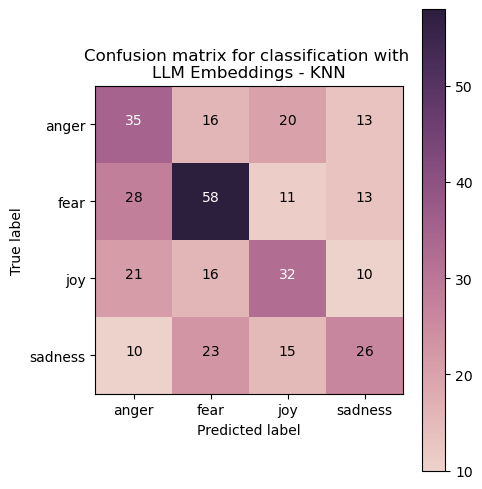

In [106]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

In [107]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [108]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [109]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [110]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [111]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [112]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [113]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [114]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 [==============================] - 2s 6ms/step - loss: 1.1976 - accuracy: 0.4752 - val_loss: 1.0454 - val_accuracy: 0.5533
Epoch 2/25
113/113 [==============================] - 1s 5ms/step - loss: 0.8582 - accuracy: 0.6493 - val_loss: 1.1019 - val_accuracy: 0.5447
Epoch 3/25
113/113 [==============================] - 1s 5ms/step - loss: 0.6848 - accuracy: 0.7263 - val_loss: 1.0396 - val_accuracy: 0.5965
Epoch 4/25
113/113 [==============================] - 1s 5ms/step - loss: 0.5578 - accuracy: 0.7902 - val_loss: 1.1858 - val_accuracy: 0.5360
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4666 - accuracy: 0.8248 - val_loss: 1.2810 - val_accuracy: 0.5562
Epoch 6/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4013 - accuracy: 0.8552 - val_loss: 1.3750 - val_accuracy: 0.5389
Epoch 7/25
113/113 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.8824 - val_loss: 1.5112 - val_accuracy: 0.5504
Epoch 

In [115]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.0000000e+00, 7.9753574e-12, 7.8111163e-11, 5.1466347e-09],
       [8.1396411e-06, 9.3928206e-01, 3.8592219e-02, 2.2117538e-02],
       [2.2589904e-03, 7.0377982e-01, 2.9425635e-05, 2.9393178e-01],
       [2.9797653e-05, 1.7634603e-03, 9.7326678e-01, 2.4939924e-02],
       [1.6296717e-03, 7.4693507e-01, 1.1952418e-02, 2.3948292e-01]],
      dtype=float32)

In [116]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'joy', 'fear'], dtype=object)

In [117]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [118]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.475228,1.197617,0.553314,1.045439
1,1,0.649322,0.858238,0.544669,1.101946
2,2,0.726266,0.684790,0.596542,1.039568
3,3,0.790202,0.557801,0.536023,1.185753
4,4,0.824799,0.466635,0.556196,1.280966
5,5,0.855245,0.401299,0.538905,1.375009
6,6,0.882369,0.325071,0.550432,1.511244
7,7,0.908110,0.263155,0.567723,1.550861
8,8,0.925823,0.225269,0.570605,1.540749
9,9,0.923056,0.226169,0.579251,1.689450


In [119]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.61      0.46      0.53        84
        fear       0.63      0.70      0.66       110
         joy       0.53      0.61      0.56        79
     sadness       0.49      0.46      0.48        74

    accuracy                           0.57       347
   macro avg       0.56      0.56      0.56       347
weighted avg       0.57      0.57      0.57       347



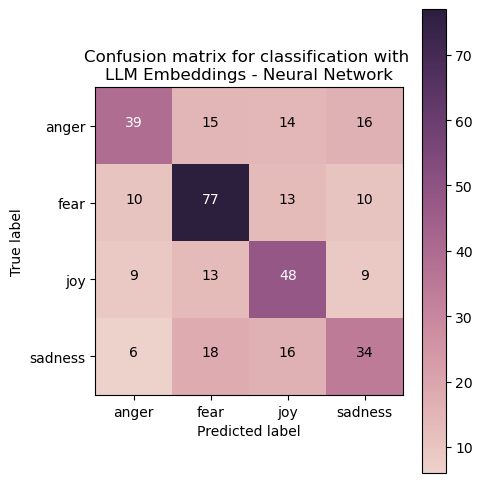

In [120]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

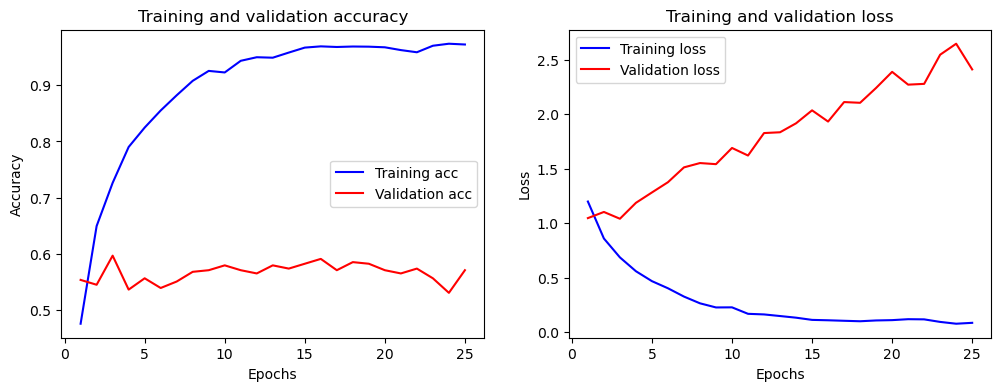

In [121]:
# Answer here
import matplotlib.pyplot as plt

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Answer

The comparison between KNN and NN using LLM embeddings highlights their contrasting abilities to leverage advanced feature representations. KNN, being a distance-based method, benefits from the rich, contextualized LLM embeddings but struggles with overlapping classes like "joy" and "sadness," leading to lower precision and recall. Its inability to learn task-specific patterns limits its performance.

In contrast, the NN significantly outperforms KNN by learning non-linear relationships and optimizing decision boundaries. It adapts LLM embeddings during training, enhancing class distinctions and delivering higher accuracy, precision, and recall. For instance, the NN excels in distinguishing "fear" and "sadness" due to its ability to fine-tune the embeddings for task-specific nuances.

Compared to other models in the lab, the LLM-based models perform better, as traditional methods like TF-IDF lack the contextual richness of LLM embeddings. However, NN's trainable architecture gives it a clear advantage over KNN, demonstrating the value of pairing robust embeddings with adaptable models.

### 10.5 Few-Shot Prompting Classification:


In [132]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



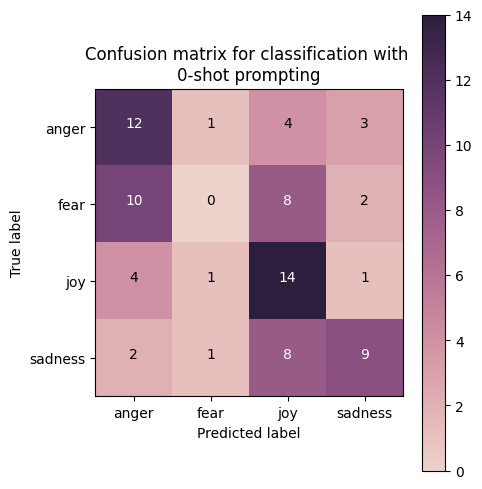

In [133]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

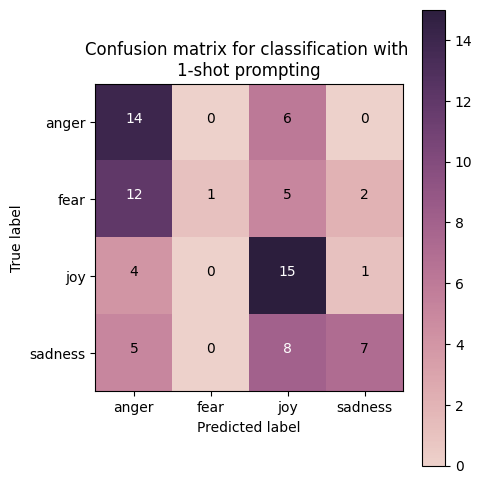

In [134]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

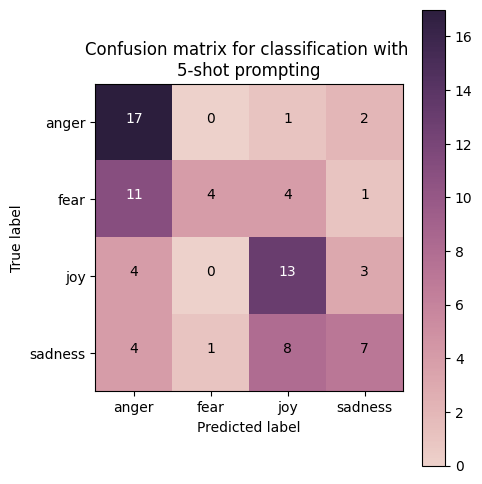

In [135]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

# Answer
The results from the 0-shot, 1-shot, and 5-shot prompting experiments demonstrate a clear progression in performance as the number of shots increases. In the 0-shot prompting scenario, the model achieves a baseline accuracy of 43.75% but struggles significantly with certain classes, particularly "Fear," which has zero precision, recall, and F1-score. This indicates the model's inability to distinguish this class without any additional context or examples. While "Anger" and "Joy" show moderate performance, the overall results highlight that the model lacks sufficient grounding to accurately classify all emotions. The confusion matrix for 0-shot prompting further reveals that misclassifications are prominent, particularly for "Fear" and "Sadness," which are often confused with other classes.

With the introduction of 1-shot prompting, there is a slight improvement in overall accuracy to 46.25%, along with noticeable enhancements in the precision and recall for "Anger" and "Joy." Interestingly, the precision for "Fear" improves to 1.00, but this comes at the expense of extremely poor recall (0.05), indicating that the model predicts "Fear" sparingly but with high precision when it does. This shows that the model starts to pick up on some patterns for specific classes but still lacks robustness, as evidenced by the continued misclassifications in the confusion matrix. "Sadness" sees moderate performance, but its recall drops slightly, suggesting that while the model is learning, it is still far from optimal.

The 5-shot prompting results show the most significant improvement, with accuracy increasing to 51.25%. Both precision and recall see noticeable enhancements across most classes, particularly for "Anger," which achieves the highest recall (0.85) and F1-score (0.61). "Fear," which was previously the most challenging class, also improves in recall and F1, demonstrating that providing a few more examples allows the model to better grasp its features. However, "Sadness" remains somewhat inconsistent, showing improvement in some metrics but not in others. The confusion matrix for 5-shot prompting indicates reduced misclassifications overall, suggesting that the model becomes better at distinguishing between classes as it is given more context through additional shots.

In conclusion, the transition from 0-shot to 5-shot prompting demonstrates the model's increasing ability to learn and generalize. The improvements highlight the value of few-shot learning in enhancing classification performance, especially for challenging classes like "Fear." However, the persistent difficulties with certain classes suggest that additional techniques, such as better embeddings, fine-tuning, or targeted augmentation, may be required to achieve higher performance. This progression underscores the importance of incremental learning and contextual examples in tasks involving nuanced classifications like emotion recognition.

---